In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import scipy.stats as sstats
from sklearn.model_selection import train_test_split
from sklearn.cluster import Birch
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import tqdm

from KNN import KNN

In [8]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

data_batch_1 = unpickle('cifar10/data_batch_1')

db1_labels = np.array(data_batch_1[b'labels'])
db1_data = np.array(data_batch_1[b'data'])

train_x, test_x, train_y, test_y = train_test_split(db1_data, db1_labels, test_size=0.33)

train_x = train_x.reshape(-1, 32*32, 3)
test_x = test_x.reshape(-1, 32*32, 3)

In [9]:
def to_grayscale(x):
    new_x = x[:,:,0] * 0.3 + x[:, :, 1] * 0.59 + x[:, :, 2] * 0.11
    return new_x.astype(int)

In [10]:
train_x = to_grayscale(train_x)
test_x = to_grayscale(test_x)

In [18]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for k in tqdm.tqdm(kernels):
    svc = SVC(kernel=k, gamma='auto')
    svc.fit(train_x, train_y)
    preds = svc.predict(test_x)
    acc = np.count_nonzero(preds == test_y) / len(test_y)
    
    print(f'Kernel: {k}, acc: {acc}')

 25%|██▌       | 1/4 [02:31<07:35, 151.95s/it]

Kernel: linear, acc: 0.2875757575757576


 50%|█████     | 2/4 [03:57<04:23, 131.97s/it]

Kernel: poly, acc: 0.4084848484848485


 75%|███████▌  | 3/4 [06:07<02:11, 131.56s/it]

Kernel: rbf, acc: 0.09363636363636364


100%|██████████| 4/4 [08:12<00:00, 123.23s/it]

Kernel: sigmoid, acc: 0.09363636363636364


Degree: 2, acc: 0.3987878787878788
Degree: 3, acc: 0.4084848484848485
Degree: 4, acc: 0.3975757575757576
Degree: 5, acc: 0.38333333333333336


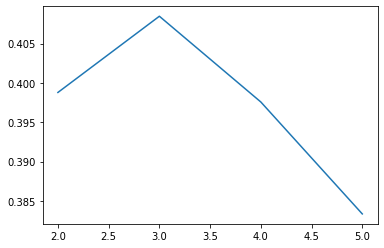

In [20]:
k = 'poly'
degrees = np.arange(2, 6)
accs = []

for d in degrees:
    svc = SVC(kernel=k, gamma='auto', degree=d)
    svc.fit(train_x, train_y)
    preds = svc.predict(test_x)
    acc = np.count_nonzero(preds == test_y) / len(test_y)
    accs.append(acc)
    
    print(f'Degree: {d}, acc: {acc}')

plt.plot(degrees, accs)

In [22]:
d = 3
svc = SVC(kernel=k, gamma='scale', degree=d)
svc.fit(train_x, train_y)
preds = svc.predict(test_x)
acc = np.count_nonzero(preds == test_y) / len(test_y)
accs.append(acc)

print(f'Degree: {d}, acc: {acc}')

Degree: 3, acc: 0.42454545454545456
